In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Load and Cleaning


In [62]:
dataset = pd.read_csv(
    "../dataset/Survey on the Impact of AI Tools on Students  (Responses) - Form Responses 1.csv",
    engine="pyarrow",
)

dataset.columns

Index(['Timestamp',
       'Which institute are you from? (e.g. BUET/BRAC/MIST/IUB/NSU/IUT/etc.)',
       'Academic Major Discipline', 'What is your gender?', 'Age(in Years)',
       'What is your Educational Level', 'Where are you located?',
       'Are you familiar with AI tools?',
       'Which AI tools are you familiar with? (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)',
       'I use AI tools for the following tasks:  (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)',
       'I regularly use/used AI for my studies and academic works',
       'When searching for something, I tend to use AI tools more than web or book resources',
       'When brainstorming for any ideas, I tend to use AI for that purpose',
       'I often use AI for decision-making tasks',
       'I regularly use AI plu

In [63]:
dataset.columns = dataset.columns.str.strip()

In [64]:
sns.set_theme(style="whitegrid")

# Demographic Analysis


### Age Distribution


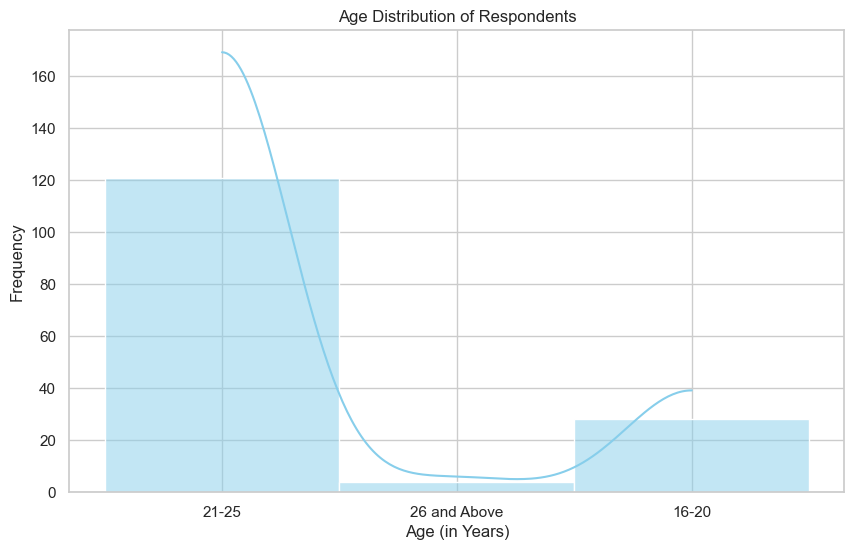

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset["Age(in Years)"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age (in Years)")
plt.ylabel("Frequency")
filename = "../results/age_distribution_of_respondents.png"
plt.show()

### Gender Ratio


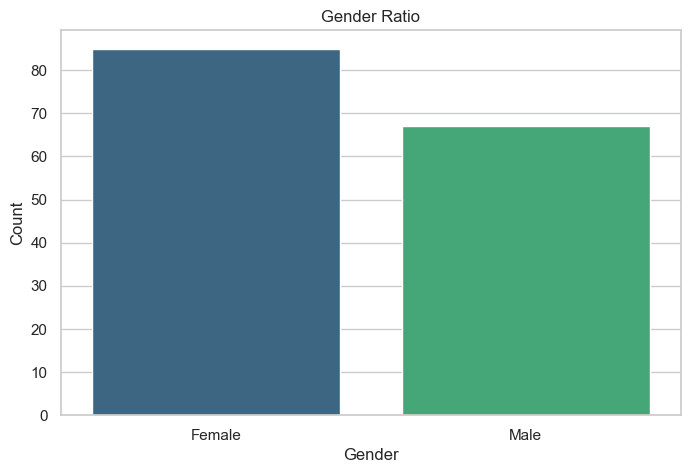

In [66]:
plt.figure(figsize=(8, 5))
gender_counts = dataset["What is your gender?"].value_counts()
gender_counts = gender_counts[gender_counts.index != "Helicopter"]
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    hue=gender_counts.index,
    palette="viridis",
    legend=False,
)
plt.title("Gender Ratio")
plt.xlabel("Gender")
plt.ylabel("Count")
filename = "../results/gender_ratio.png"
plt.savefig(filename)
plt.show()

### Educational Level and Academic Discipline

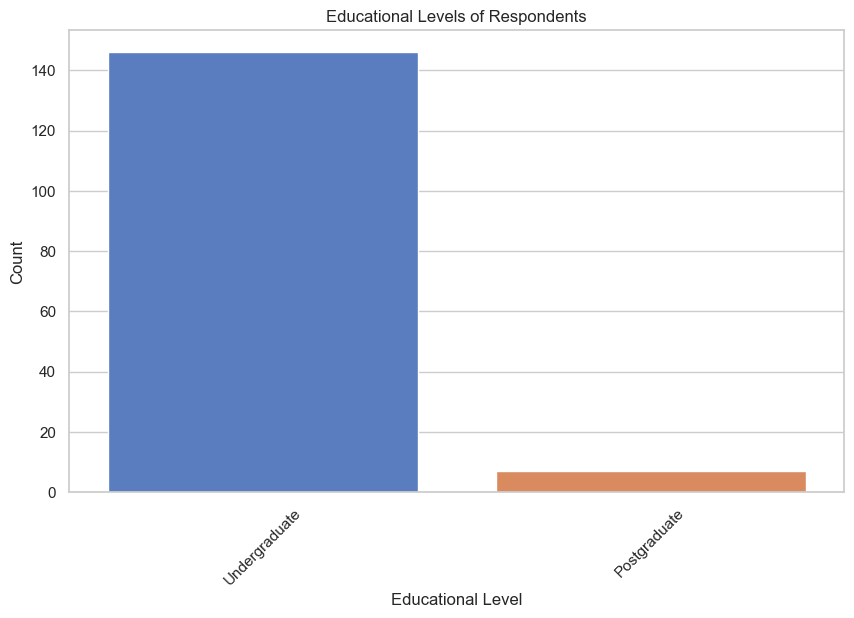

In [67]:
plt.figure(figsize=(10, 6))
edu_counts = dataset["What is your Educational Level"].value_counts()
sns.barplot(
    x=edu_counts.index,
    y=edu_counts.values,
    palette="muted",
    hue=edu_counts.index,
    legend=False,
)
plt.title("Educational Levels of Respondents")
plt.xlabel("Educational Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/educational_levels_of_respondents.png"
plt.savefig(filename)
plt.show()

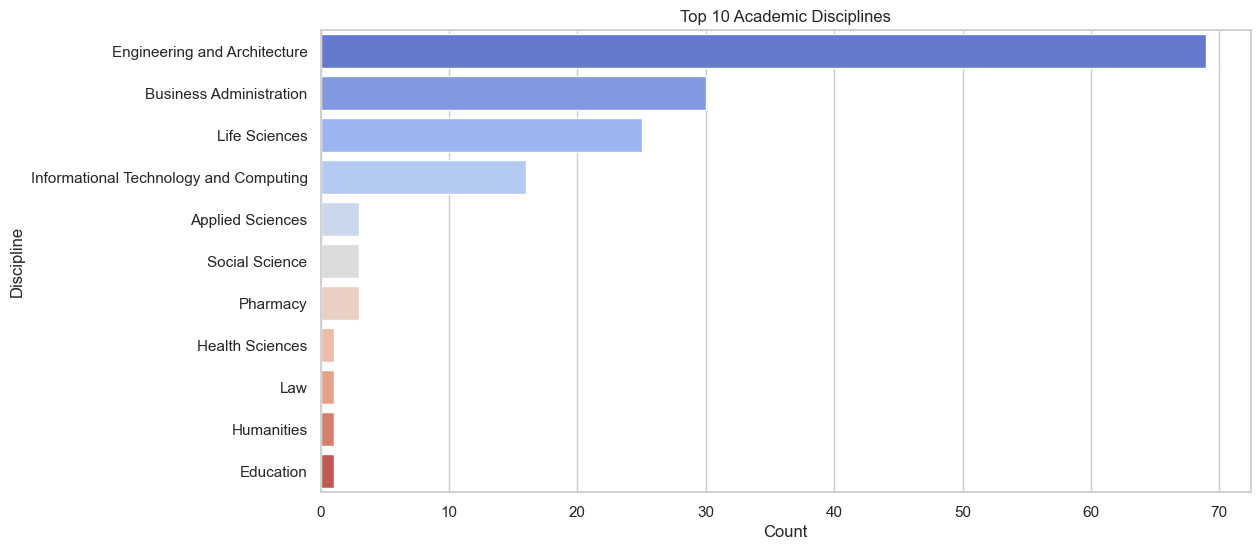

In [68]:
plt.figure(figsize=(12, 6))
major_counts = dataset["Academic Major Discipline"].value_counts()

# These two are more or less the same major, so we combine them
major_counts["Informational Technology and Computing"] += major_counts[
    "Informational Technology"
]
major_counts = major_counts.drop("Informational Technology")

sns.barplot(
    y=major_counts.index,
    x=major_counts.values,
    palette="coolwarm",
    hue=major_counts.index,
    legend=False,
)
plt.title("Top 10 Academic Disciplines")
plt.xlabel("Count")
plt.ylabel("Discipline")
filename = "../results/top_10_academic_disciplines.png"
plt.savefig(filename)
plt.show()

# AI Tools Familiarity and Usage Statistics

### AI Tools Familiarity

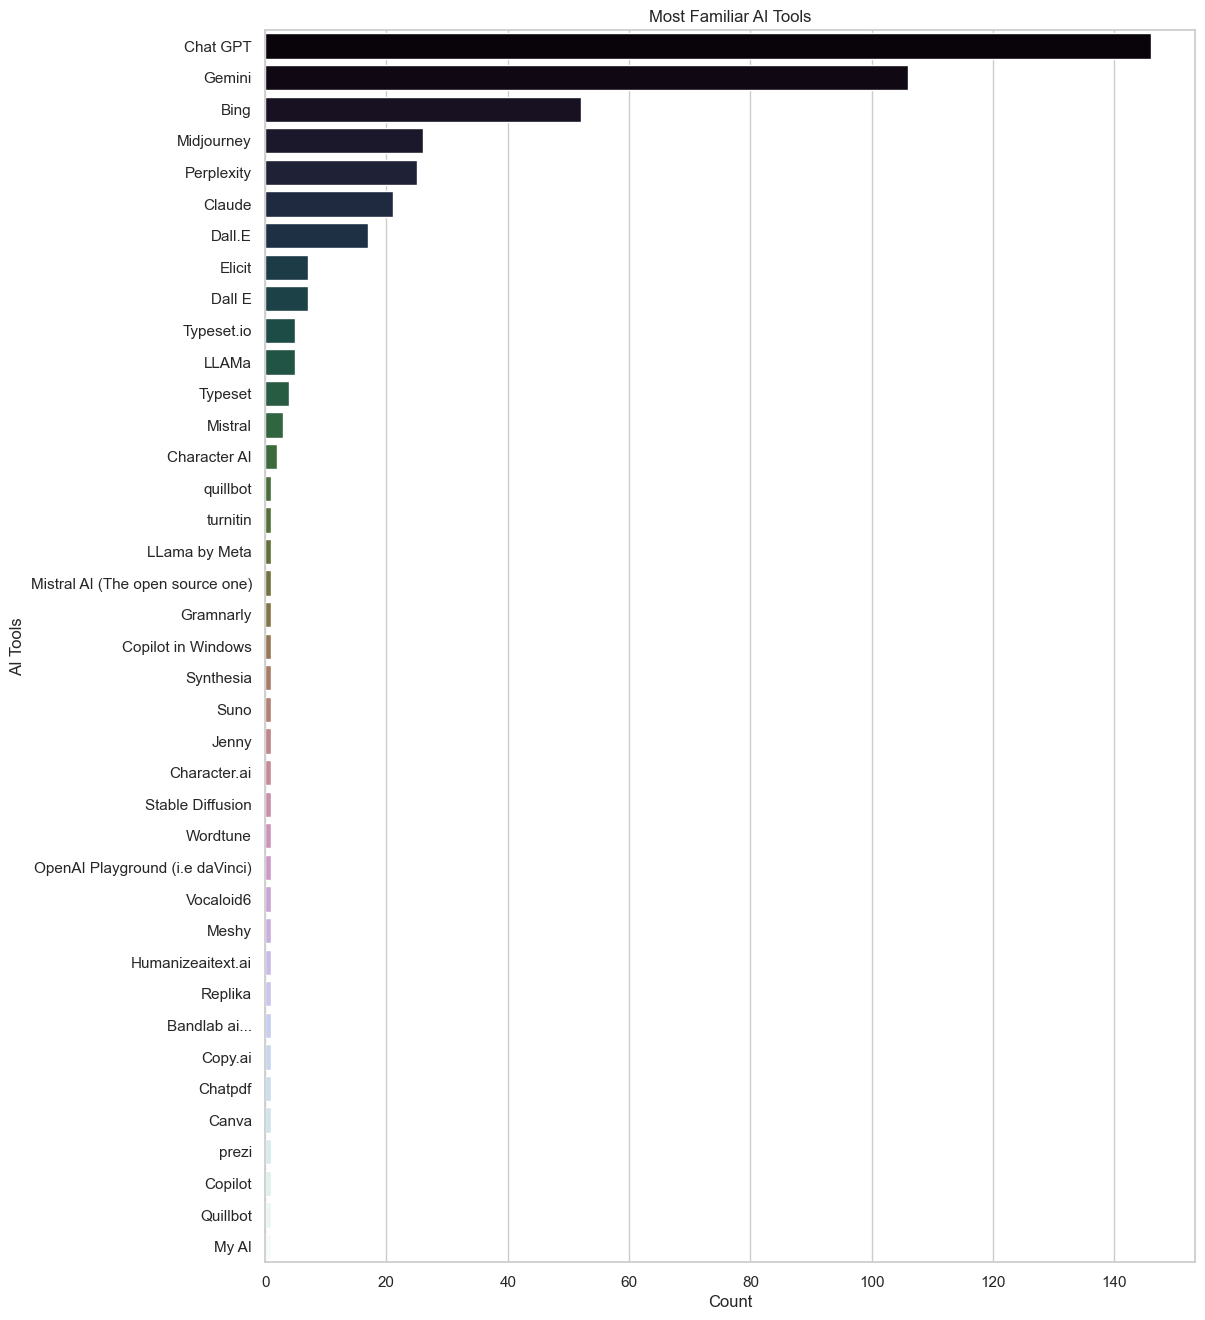

In [69]:
dataset["AI Tools Familiarity"] = dataset[
    'Which AI tools are you familiar with? (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)'
].str.split(",")

dataset["AI Usage Tasks"] = dataset[
    'I use AI tools for the following tasks:  (Select all that applies। You may also enter your own preferences in "other". Write them with comma (,) if you have multiple preferences to enter)'
].str.split(",")

# Flatten the lists and count occurrences for familiarity
tools_familiarity = (
    dataset["AI Tools Familiarity"].dropna().explode().str.strip().value_counts()
)

# Plot the most familiar AI tools
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tools_familiarity.index[:],
    x=tools_familiarity.values[:],
    palette="cubehelix",
    hue=tools_familiarity.index[:],
    legend=False,
)
plt.title("Most Familiar AI Tools")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_all.png"
plt.savefig(filename)
plt.show()

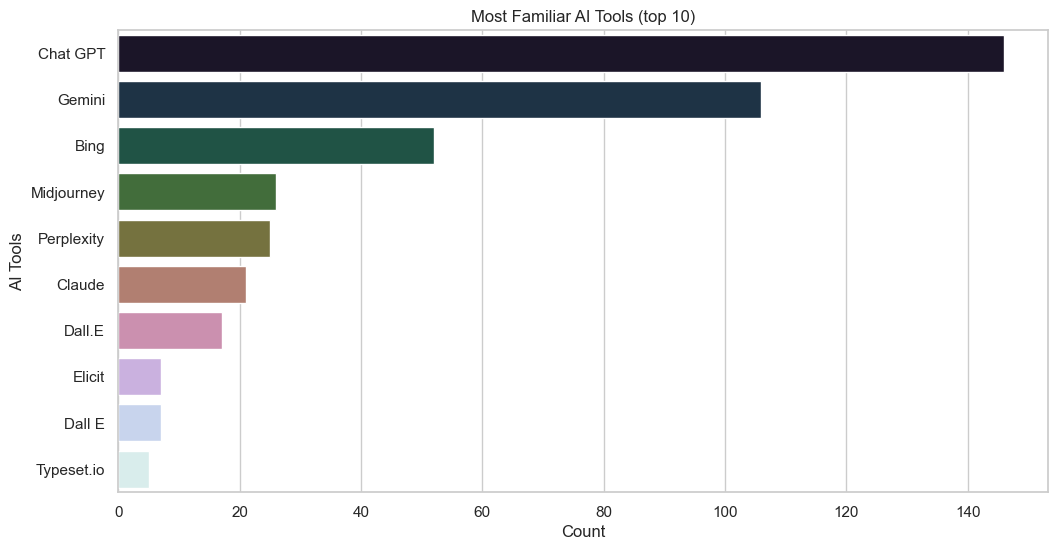

In [70]:
# Plot the most familiar AI tools (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tools_familiarity.index[:10],
    x=tools_familiarity.values[:10],
    palette="cubehelix",
    hue=tools_familiarity.index[:10],
    legend=False,
)
plt.title("Most Familiar AI Tools (top 10)")
plt.xlabel("Count")
plt.ylabel("AI Tools")
filename = "../results/most_familiar_ai_tools_top_10.png"
plt.savefig(filename)
plt.show()

### AI Tools Usage

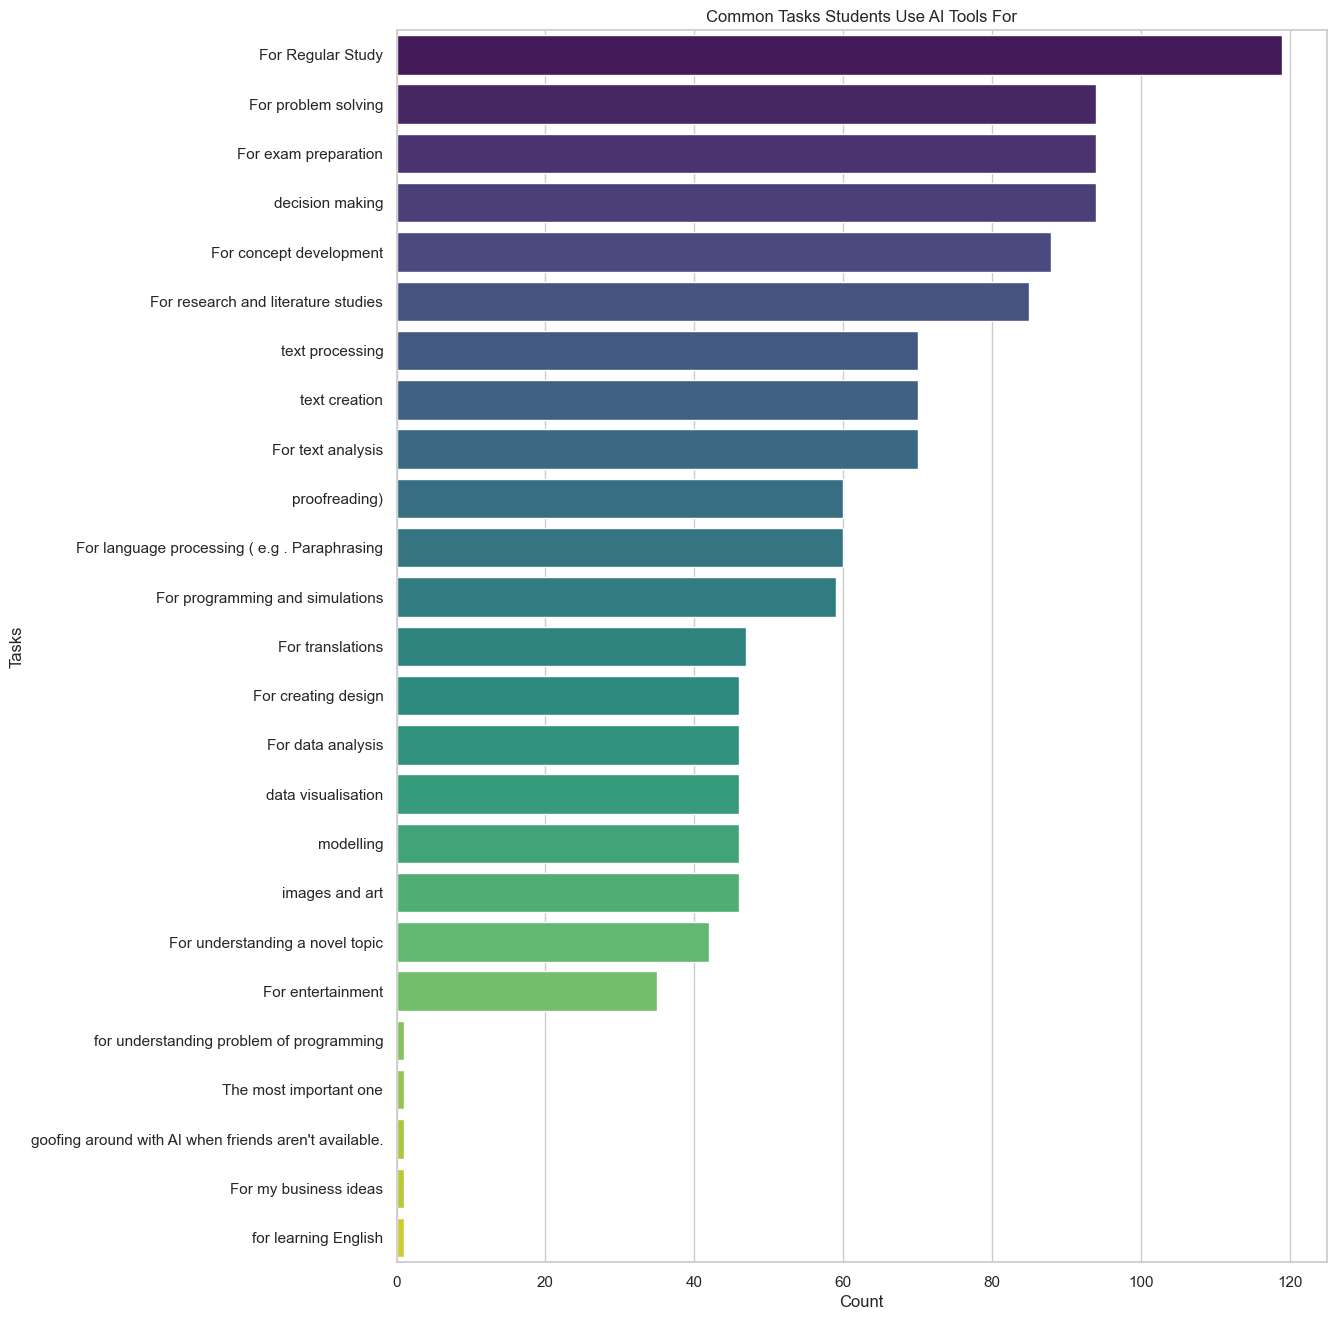

In [71]:
# Flatten the lists and count occurrences for usage tasks
tasks_usage = dataset["AI Usage Tasks"].dropna().explode().str.strip().value_counts()
tasks_usage = tasks_usage[tasks_usage.index != ""]

# Plot the common tasks for AI usage
plt.figure(figsize=(12, 16))
sns.barplot(
    y=tasks_usage.index[:],
    x=tasks_usage.values[:],
    palette="viridis",
    hue=tasks_usage.index[:],
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all.png"
plt.savefig(filename)
plt.show()

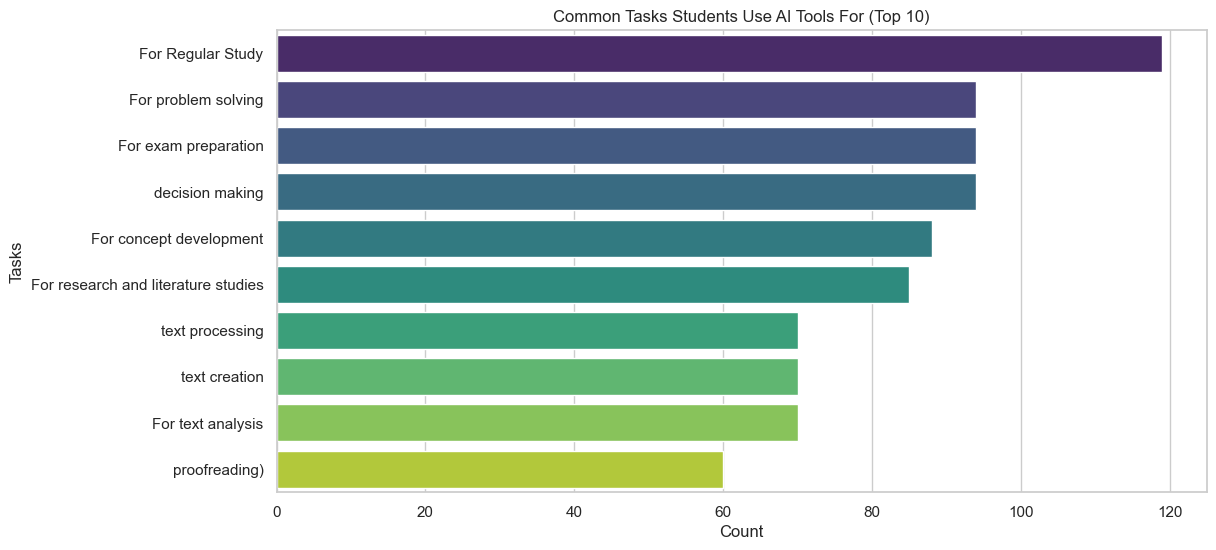

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(
    y=tasks_usage.index[:10],
    x=tasks_usage.values[:10],
    palette="viridis",
    hue=tasks_usage.index[:10],
    legend=False,
)
plt.title("Common Tasks Students Use AI Tools For (Top 10)")
plt.xlabel("Count")
plt.ylabel("Tasks")
filename = "../results/common_tasks_students_use_ai_tools_for_all_top_10.png"
plt.savefig(filename)
plt.show()

# Usage Trends

### Frequency of AI tool usage (Understanding Complex Topics)

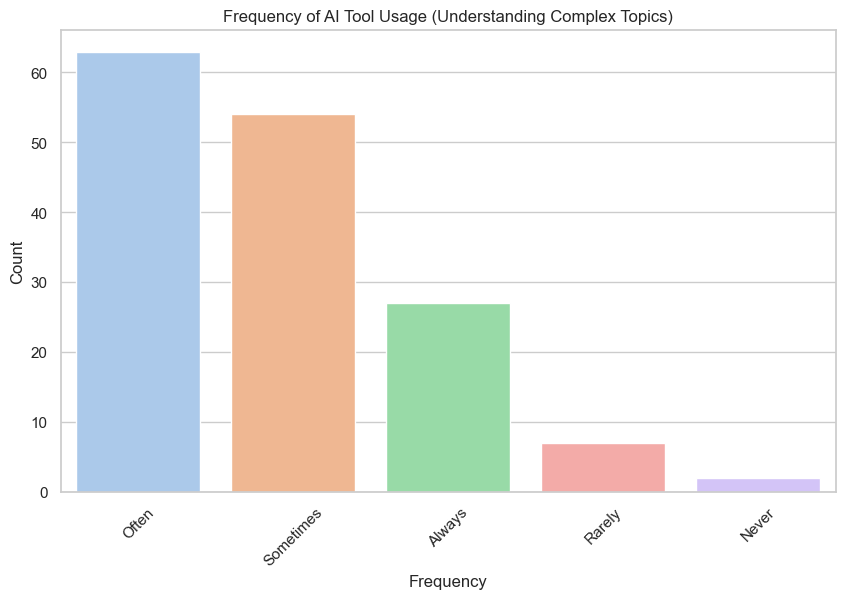

In [75]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset[
    "How often do you rely on AI tools for help in understanding complex topics in your coursework?"
].value_counts()
sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="pastel",
    hue=usage_frequency.index,
    legend=False,
)
plt.title("Frequency of AI Tool Usage (Understanding Complex Topics)")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
filename = "../results/frequency_of_ai_tool_usage_understanding_complex_topics.png"
plt.savefig(filename)
plt.show()

### Frequency of AI tool usage (Decision Making)

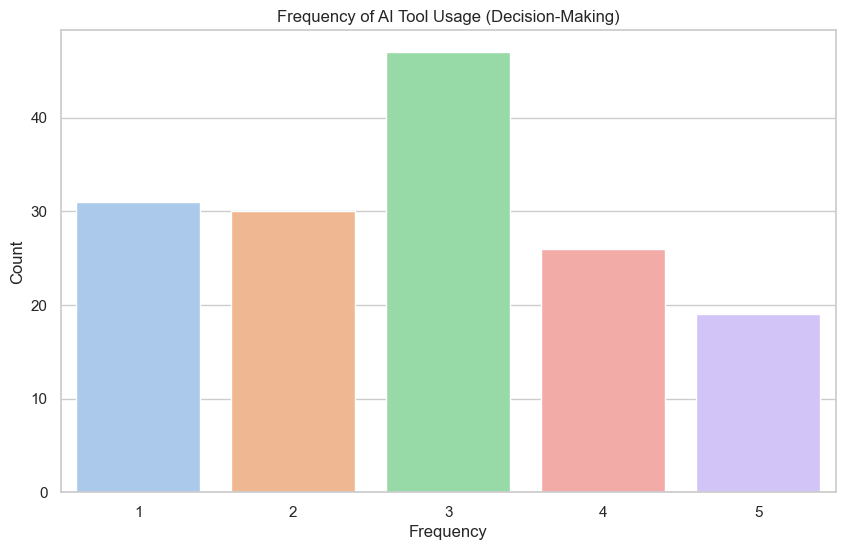

In [77]:
plt.figure(figsize=(10, 6))
usage_frequency = dataset["I often use AI for decision-making tasks"].value_counts()

sns.barplot(
    x=usage_frequency.index,
    y=usage_frequency.values,
    palette="pastel",
    hue=usage_frequency.index,
    legend=False,
)

plt.title("Frequency of AI Tool Usage (Decision-Making)")
plt.xlabel("Frequency")
plt.ylabel("Count")
filename = "../results/frequency_of_ai_tool_usage_decision_making.png"
plt.savefig(filename)